In [51]:
#2017年B题  “拍照赚钱”的任务定价

#“拍照赚钱”是移动互联网下的一种自助式服务模式。用户下载APP，注册成为APP的会员，然后从APP上领取需要拍照的任务（比如上超市去检查某种商品的上架情况），赚取APP对任务所标定的酬金。这种基于移动互联网的自助式劳务众包平台，为企业提供各种商业检查和信息搜集，相比传统的市场调查方式可以大大节省调查成本，而且有效地保证了调查数据真实性，缩短了调查的周期。因此APP成为该平台运行的核心，而APP中的任务定价又是其核心要素。如果定价不合理，有的任务就会无人问津，而导致商品检查的失败。
#附件一是一个已结束项目的任务数据，包含了每个任务的位置、定价和完成情况（“1”表示完成，“0”表示未完成）；附件二是会员信息数据，包含了会员的位置、信誉值、参考其信誉给出的任务开始预订时间和预订限额，原则上会员信誉越高，越优先开始挑选任务，其配额也就越大（任务分配时实际上是根据预订限额所占比例进行配发）；附件三是一个新的检查项目任务数据，只有任务的位置信息。请完成下面的问题：
#1.研究附件一中项目的任务定价规律，分析任务未完成的原因。
#解题思路：K means clustering对历史数据进行分类，尝试找到定价规律


In [51]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d as p3d

In [90]:
df = pd.read_excel("C:\Users\ifund\Desktop\customer.xls") #load the dataset
df.drop("number",axis=1,inplace=True)
df.head()

,latitude,longitude,price,category
0,22.566142,113.980837,66.0,0
1,22.686205,113.940525,65.5,0
2,22.576512,113.957198,65.5,1
3,22.564841,114.244571,75.0,0
4,22.558888,113.950723,65.5,0


In [91]:
# Change categorical data to number 0-2
df["category"] = pd.Categorical(df["category"])
df["category"] = df["category"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:3]
category = df.values[:, 3]

In [92]:
print data

[[ 22.56614225 113.98083678  66.        ]
 [ 22.68620526 113.94052521  65.5       ]
 [ 22.57651183 113.957198    65.5       ]
 ...
 [ 22.81467597 113.8277312   85.        ]
 [ 23.06367398 113.7711884   65.5       ]
 [ 23.12329431 113.11038234  85.        ]]


array([[ 22.82405312, 113.45075045,  67.83969061],
       [ 22.84674916, 113.05342468,  70.38114791]])

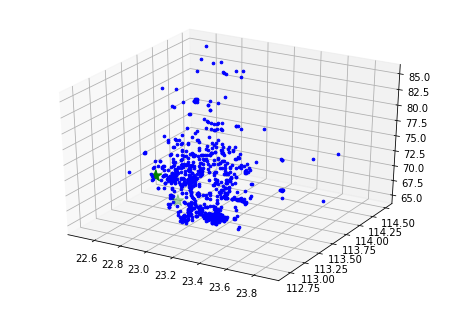

In [112]:
# Number of clusters
k = 2
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue']
fig=plt.figure()
ax=p3d.Axes3D(fig)
for i in range(n):
    ax.scatter(data[i, 0], data[i,1],data[i,2], s=7,c='blue')
ax.scatter(centers[:,0], centers[:,1],centers_new[:,2],marker='*', c='g', s=150)
centers

In [121]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new
center_0=centers_new[0]
center_1=centers_new[1]
print data-center_0

[[-0.38394494  0.42142437 -0.21613546]
 [-0.26388193  0.38111281 -0.71613546]
 [-0.37357536  0.3977856  -0.71613546]
 ...
 [-0.13541122  0.26831879 18.78386454]
 [ 0.11358679  0.21177599 -0.71613546]
 [ 0.17320711 -0.44903007 18.78386454]]


In [98]:
#assign the samples to the nearest center
def d(P,Q):#Euclidean Distance
    sum=0
    for i in range (len(P)):
        sum+=(P[i]-Q[i])**2
    return sum**0.5

    

In [99]:
df['category_predict']=None
df.head()

,latitude,longitude,price,category,category_predict
0,22.566142,113.980837,66.0,0,None
1,22.686205,113.940525,65.5,0,None
2,22.576512,113.957198,65.5,1,None
3,22.564841,114.244571,75.0,0,None
4,22.558888,113.950723,65.5,0,None


In [100]:
data

array([[ 22.56614225, 113.98083678,  66.        ],
       [ 22.68620526, 113.94052521,  65.5       ],
       [ 22.57651183, 113.957198  ,  65.5       ],
       ...,
       [ 22.81467597, 113.8277312 ,  85.        ],
       [ 23.06367398, 113.7711884 ,  65.5       ],
       [ 23.12329431, 113.11038234,  85.        ]])

In [120]:
df['distance_min']=None
df['distance_max']=None
for i in range (int(data.shape[0])):
    d0=d(data[i],center_0)
    d1=d(data[i],center_1)
    if d0==min(d0,d1):
        df.loc[i,'category_predict']=0
        df.loc[i,'distance_min']=d0
        df.loc[i,'distance_max']=d1
    elif d1==min(d0,d1):
        df.loc[i,'category_predict']=1
        df.loc[i,'distance_min']=d1
        df.loc[i,'distance_max']=d0
    
df.head()

,latitude,longitude,price,category,category_predict,distance,distance_min,distance_max
0,22.566142,113.980837,66.0,0,0,0.594034,0.594034,6.44607
1,22.686205,113.940525,65.5,0,0,0.570844,0.570844,6.93431
2,22.576512,113.957198,65.5,0,0,0.638163,0.638163,6.94153
3,22.564841,114.244571,75.0,1,1,2.72438,2.72438,9.20205
4,22.558888,113.950723,65.5,0,0,0.644404,0.644404,6.94228


In [122]:
#calculating accuracy
count=0
for i in range(df.shape[0]):
    if df.loc[i,'category']==df.loc[i,'category_predict']:
        count+=1
accuracy=count/float(df.shape[0])
accuracy

1.0

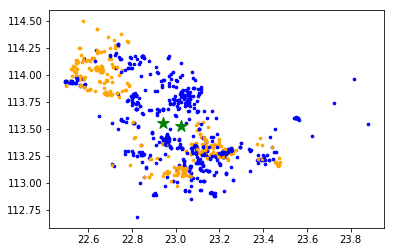

In [113]:
# Plot the data and the new centers generated
colors=['orange', 'blue']
colors=['orange', 'blue']

for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7,color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1],marker='*', c='g', s=150)

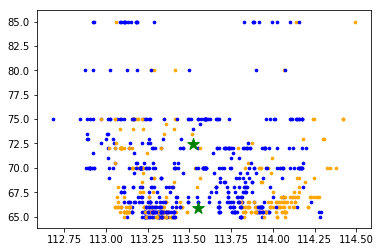

In [114]:
for i in range(n):
    plt.scatter(data[i, 1], data[i,2], s=7,color = colors[int(category[i])])
plt.scatter(centers_new[:,1], centers_new[:,2],marker='*', c='g', s=150)

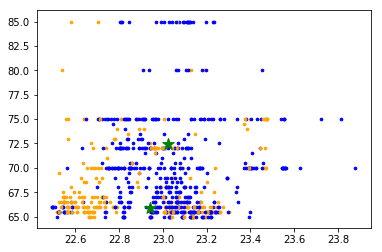

In [115]:
for i in range(n):
    plt.scatter(data[i, 0], data[i,2], s=7,color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,2],marker='*', c='g', s=150)

<IPython.core.display.Javascript object>


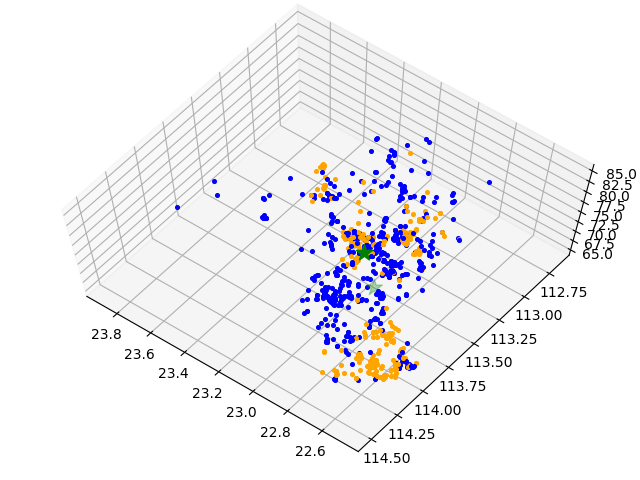

In [117]:
%matplotlib notebook
colors=['orange', 'blue']
fig2=plt.figure()
ax2=p3d.Axes3D(fig2)
for i in range(n):
    ax2.scatter(data[i, 0], data[i,1],data[i,2], s=7,color = colors[int(category[i])])
ax2.scatter(centers_new[:,0], centers_new[:,1],centers_new[:,2],marker='*', c='g', s=150)